# MACHINE LEARNING
# IGA-01 Bankruptcy prediction


### Students
Dmitry Timerbaev,
Zamira Magomedova,
Daria Dobrego,
Reynier Ambroise


### Setup of the problem

In this assignment you are asked to continue working with the problem of bankruptcy prediction. You will need to program a function which, for different cut-offs, calculates recalls for Classes 0 and 1 for a logistic regression. Also, the maximum accuracy value (on the range of cutoffs) and the corresponding cut-off value should be found. This function should help a data analyst decide on the optimal value of the cut-off for a logistic regression classifier.

**HINTS**

To code the function, you will need the following functions from the standard modules:

- LogisticRegression from sklean.linear_models
- predict_proba (see the help file on LogisticRegression)
- np.linspace
- accuracy_score from sklm
- recall_score from sklm
- np.max
- np.argmax

Also keep in mind that in Python values **True** and **False** can be converted correspondingly to 1 and 0 with the *.astype(int)* method.

As a result, you need to reconstruct the following graph:

![Recalls](recalls.png)


In [1]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as sklm

from sklearn.linear_model import LogisticRegression

In [2]:
# read the training and the test samples
df_bank_train=pd.read_csv("bankloans_train.csv")
df_bank_test=pd.read_csv("bankloans_test.csv")

# get X_train and y_train
X_train = df_bank_train.drop("default", axis=1)
y_train = df_bank_train["default"]

# get X_test and y_test
X_test = df_bank_test.drop("default", axis=1)
y_test = df_bank_test["default"]

In [3]:
# produce a range of cut-offs
n_bins = 500
cutoffs = np.linspace(start=0, stop=1, num=n_bins)

# Task 1 (2 points)

**Program a function to calculate recalls for Classes 0 and 1, as well as the overall accuracy of prediction, for a range of above-given cut-offs.**

In [4]:
def RecallsAccuracy(X_tr, y_tr, X_te, y_te, cutoffs):
    
    # values opposite of y_te
    y_test0 = np.array([(y_te[i] != 1).astype(int) for i in range(len(y_te))]) 
    
    # estimate a basic logistic regression for the given training data
    clfr = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X_tr, y_tr)
    
    # predict probabilities for the given test data
    predictions = clfr.predict_proba(X_te)

    # make containers
    recalls_0=[]
    recalls_1=[]
    acc_scores=[]
    
    # run the loop
    for cutoff in cutoffs:
    
        ## calculate predictions - no need to reestimate regression!
        class0 = np.array([(predictions[i][1]<cutoff).astype(int) for i in range(len(X_te))])
        class1 = np.array([(predictions[i][1]>cutoff).astype(int) for i in range(len(X_te))])
        
        ## calculate accuracy
        acc_score = sklm.accuracy_score(y_te, class1)
        
        ## calculate recalls
        recall0 = sklm.recall_score(y_test0, class0)
        recall1 = sklm.recall_score(y_te, class1)
        
        ## store results
        recalls_0.append(recall0)
        recalls_1.append(recall1)
        acc_scores.append(acc_score)
     
    
    # return the results
    return [recalls_0, recalls_1, acc_scores]

In [5]:
# call the function
metrics_all = RecallsAccuracy(X_tr=X_train, y_tr=y_train, X_te=X_test, y_te=y_test, cutoffs=cutoffs)

## Task 2. (1 point)

**Calculate and print out the maximum accuracy (on the range of cutoffs) and the corresponding cut-off value.**

In [80]:
# calculate maximum accuracy
max_acc_value = np.max(metrics_all[2])
max_acc_index = np.argmax(metrics_all[2])
max_acc_cutoff = cutoffs[max_acc_index]

# print the values
print("Maximum accuracy = ", max_acc_value)
print("for cut-off = ", max_acc_cutoff)

Maximum accuracy =  0.8
for cut-off =  0.3607214428857715


## Task 3. (2 points)

**Construct (reproduce) the required graph (as given above).**

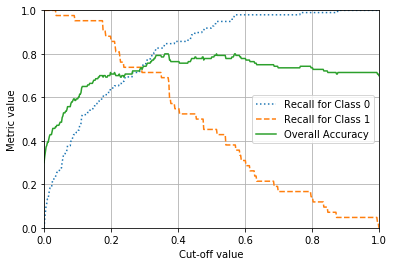

In [81]:
# construct the graph
fig, ax = plt.subplots(1,1)
linestyles = [':', '--', '-']
labels = ["Recall for Class 0", "Recall for Class 1", "Overall Accuracy"]

# setting plot axes limits
plt.xlim([0,1])
plt.ylim([0,1])

# setting axes labels and the title
ax.plot(cutoffs,metrics_all[0], label=labels[0], linestyle=linestyles[0])
ax.plot(cutoffs,metrics_all[1], label=labels[1], linestyle=linestyles[1])
ax.plot(cutoffs,metrics_all[2], label=labels[2], linestyle=linestyles[2])
plt.xlabel("Cut-off value")
plt.ylabel("Metric value")
plt.grid()

# adding the legend
plt.legend()
    
# showing the graph
plt.show()